# Exercise 1

In [1]:
# exercise 1a
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


filename = 'data/A0001.mat'
data = scipy.io.loadmat(filename)
print(data)
val = data['val']

num_leads, num_time_points = val.shape # tuple containing number of leads and time points
print(f'nr. leads: {num_leads}, nr. time points: {num_time_points}')

{'val': array([[  28,   39,   45, ...,  258,  259,  259],
       [   7,   11,   15, ...,  248,  249,  250],
       [ -21,  -28,  -30, ...,  -10,  -10,   -9],
       ...,
       [-112, -110, -108, ...,  194,  194,  195],
       [-596, -590, -582, ...,  307,  307,  307],
       [ -16,   -7,    2, ...,  213,  214,  214]], dtype=int16)}
nr. leads: 12, nr. time points: 7500


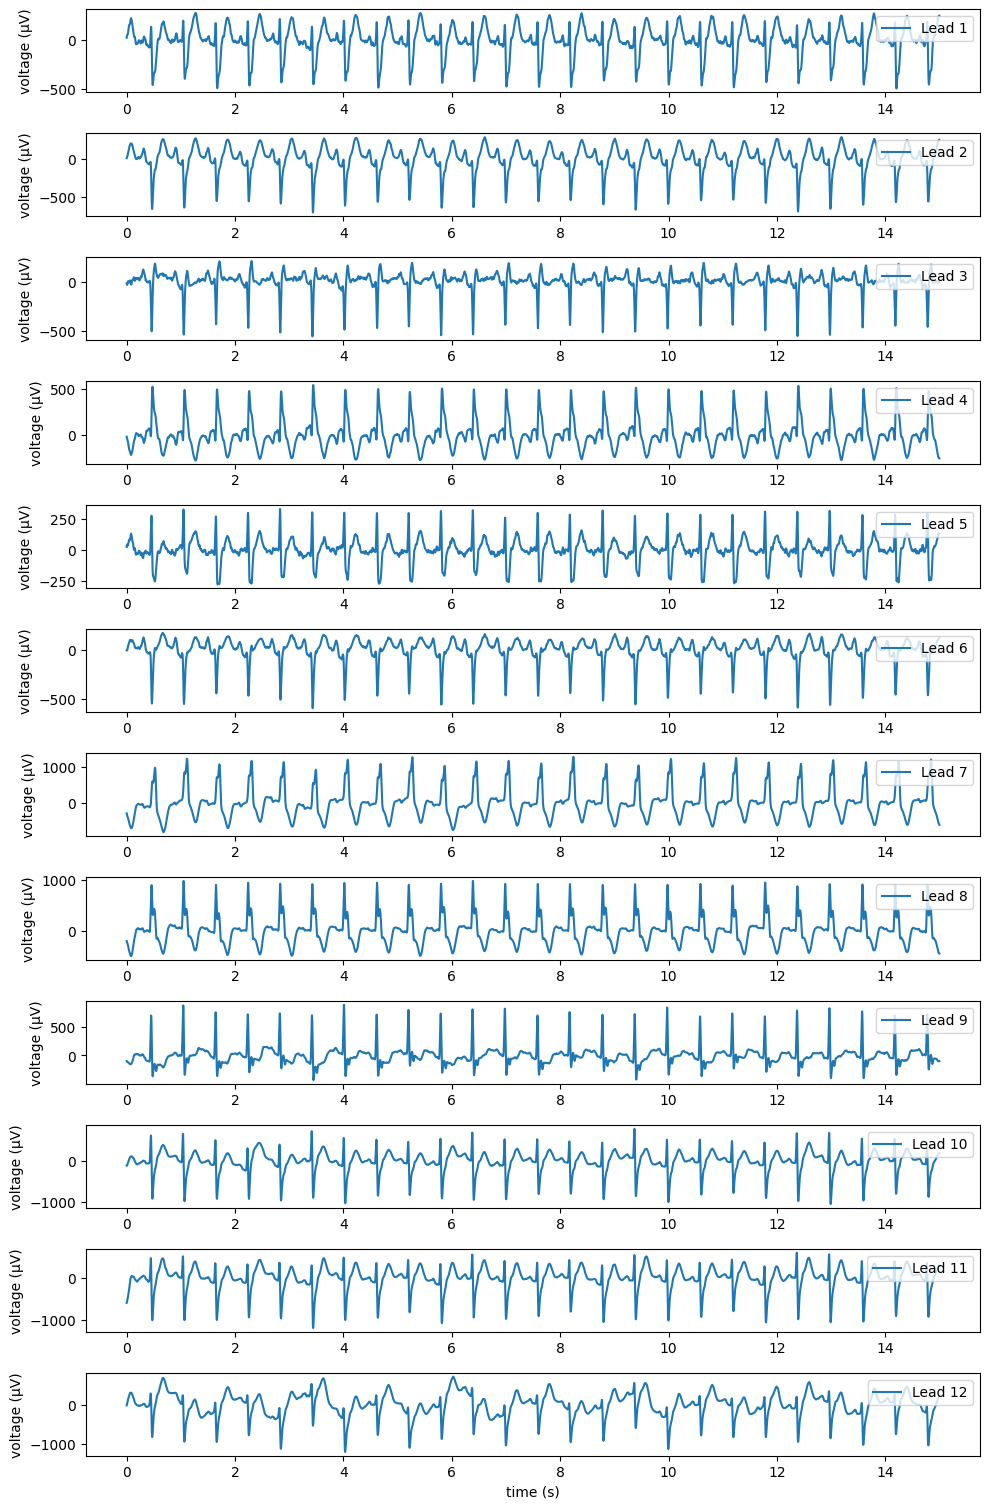

In [2]:
# exercise 1b
frequency = 500
times = np.arange(num_time_points) / frequency # x axis values

plt.figure(figsize=(10, 15))
for i in range(num_leads): # create plot for each lead
    plt.subplot(num_leads, 1, i + 1)
    plt.plot(times, val[i, :], label=f'Lead {i+1}')
    plt.legend(loc='upper right')
    plt.ylabel('voltage (µV)', loc='center')
plt.tight_layout()
plt.xlabel('time (s)', loc='center')
plt.show()

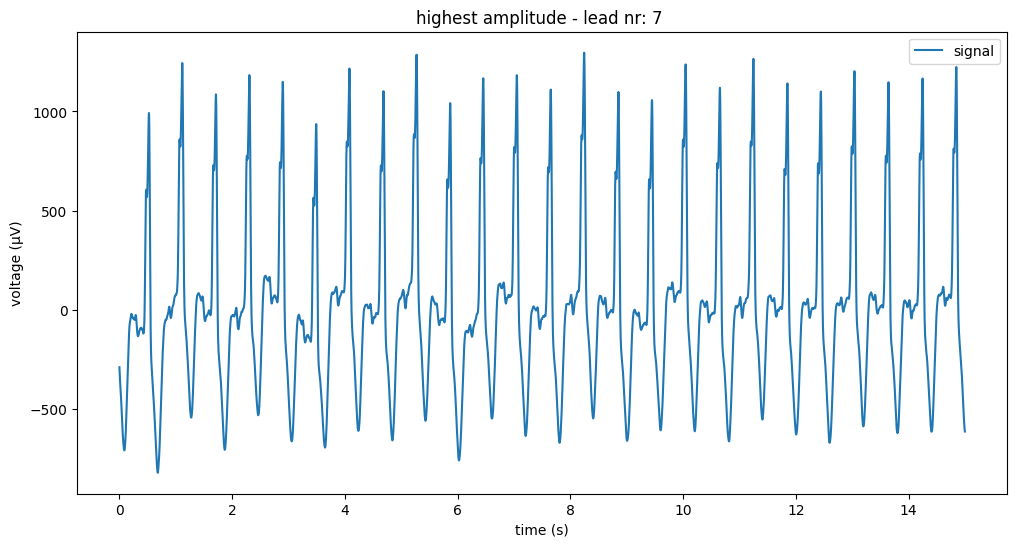

In [3]:
# search lead with highest amplitude
max_amp = np.max(np.abs(val), axis=1)
lead_highest = np.argmax(max_amp)

# plot lead with highest amplitude
plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'highest amplitude - lead nr: {lead_highest + 1} ')
plt.legend()
plt.show()


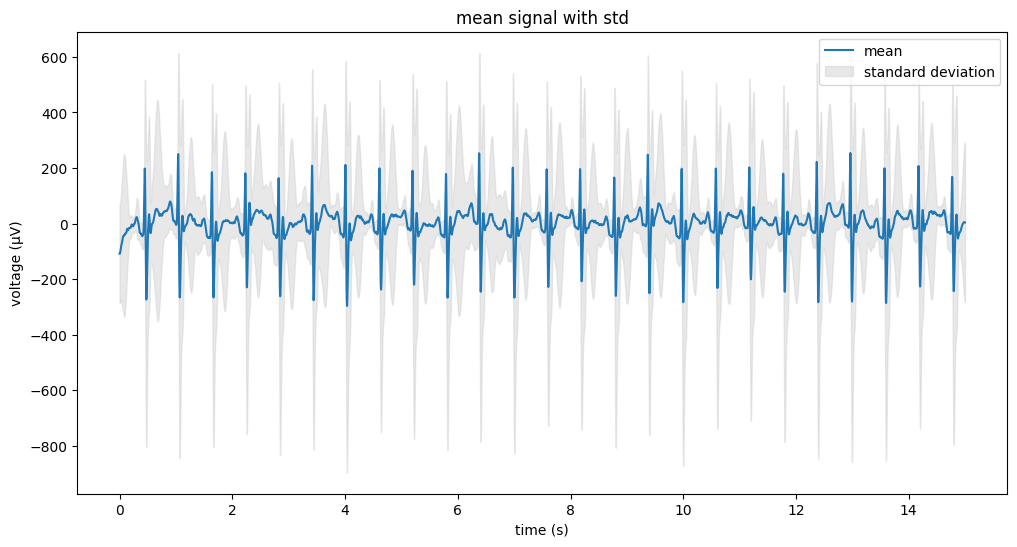

In [4]:
# exercise 1c
mean = np.mean(val, axis=0) # calculate mean over leads
std = np.std(val, axis=0) # calculate standard deviation over leads
plt.figure(figsize=(12, 6))
plt.plot(times, mean, label='mean') # plot mean
plt.fill_between(times, mean - std, mean + std, color='lightgray', alpha=0.5, label='standard deviation') # plot standard deviation relative to mean
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title('mean signal with std')
plt.legend()
plt.show()


[ 262  533  557  833  856 1130 1153 1425 1449 1745 2017 2040 2319 2342
 2613 2635 2909 2934 3203 3227 3502 3525 3803 3826 4099 4122 4401 4426
 4698 4723 4999 5022 5303 5326 5600 5623 5900 5925 6196 6221 6496 6519
 6798 6821 7101 7124 7399 7423]


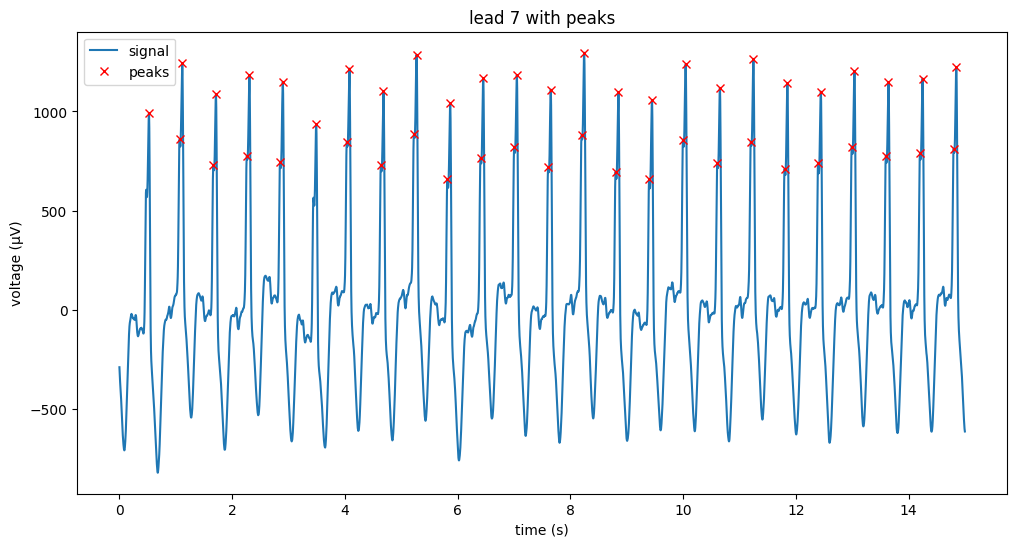

In [5]:
# exercise 2a and 2b

# find peaks in lead
def find_peaks_in_lead(data, lead, height):
    peaks, _ = find_peaks(data[lead, :], height=height)
    return peaks

peaks = find_peaks_in_lead(val, lead_highest, height=np.max(val[lead_highest, :])*0.5)
print(peaks)

# plot peaks
plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.plot(times[peaks], val[lead_highest, peaks], 'rx', label='peaks')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'lead {lead_highest + 1} with peaks')
plt.legend()
plt.show()



[ 106  125  144  237  262  411  442  533  557  702  736  793  833  856
 1006 1009 1036 1130 1153 1295 1331 1378 1425 1449 1592 1721 1745 1888
 1923 1975 1988 2017 2040 2184 2196 2214 2226 2262 2278 2288 2291 2319
 2342 2490 2516 2518 2552 2613 2635 2775 2812 2855 2870 2909 2934 3203
 3227 3366 3376 3389 3392 3407 3441 3453 3473 3502 3525 3672 3695 3708
 3746 3758 3764 3772 3803 3826 3973 4006 4068 4099 4122 4262 4264 4308
 4361 4364 4401 4426 4570 4606 4698 4723 4870 4885 4903 4936 4958 4969
 4999 5022 5170 5208 5248 5261 5273 5303 5326 5469 5491 5506 5600 5623
 5772 5793 5806 5840 5865 5900 5925 6070 6072 6105 6146 6165 6196 6221
 6369 6386 6402 6459 6496 6519 6667 6703 6750 6763 6798 6821 6965 7007
 7038 7066 7101 7124 7269 7287 7307 7336 7360 7399 7423]


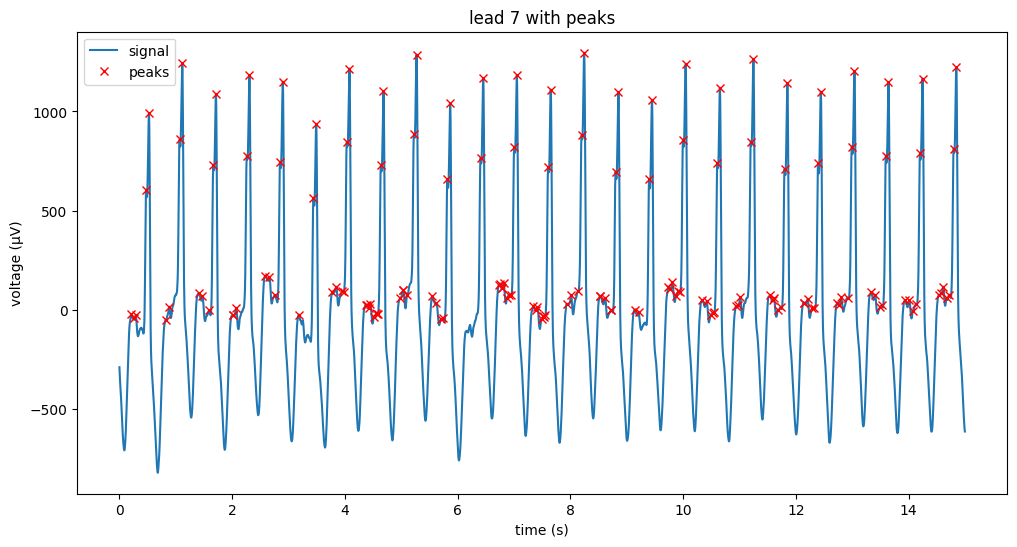

In [6]:
# experiment with height parameter
peaks = find_peaks_in_lead(val, lead_highest, height=-50) # if negative we find plateaus or local maxima and not only global maxima
print(peaks)
plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.plot(times[peaks], val[lead_highest, peaks], 'rx', label='peaks')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'lead {lead_highest + 1} with peaks')
plt.legend()
plt.show()